# Data module

## PWA data frame

In [1]:
from pycompwa.data import create

In [2]:
frame = create.pwa_frame(
    particle_names=['gamma', 'pi0', 'pi0'],
    number_of_rows=3)
frame

Particle gamma                pi0-1                pi0-2               
Momentum   p_x  p_y  p_z    E   p_x  p_y  p_z    E   p_x  p_y  p_z    E
0          NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
1          NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
2          NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN

In [3]:
frame['gamma', 'p_x'] = [-0.520903, -0.285015, 0.632325]
frame['gamma', 'p_y'] = [0.885259, 0.520381, -0.779928]
frame['gamma', 'p_z'] = [0.655934, -0.996574, -0.892786]
frame['gamma', 'E'] = [1.21872, 1.15982, 1.34357]

frame['pi0-1', 'p_x'] = [0.653672, 0.452265, 0.113717]
frame['pi0-1', 'p_y'] = [-0.813022, -0.76188, 0.605441]
frame['pi0-1', 'p_z'] = [-1.01763, 0.00723327, 0.718613]
frame['pi0-1', 'E'] = [1.46359, 0.896256, 0.956093]

frame['pi0-2', 'p_x'] = [-0.132769, -0.16725, -0.746043]
frame['pi0-2', 'p_y'] = [-0.0722372, 0.241499, 0.174487]
frame['pi0-2', 'p_z'] = [0.361697, 0.989341, 0.174172]
frame['pi0-2', 'E'] = [0.414596, 1.04082, 0.797233]

In [4]:
print('Particles:', frame.pwa.particles)
print('Momentum labels:', frame.pwa.momentum_labels)
print('Weights:', frame.pwa.weights)
print('Average pi0 mass:\n',
      frame[['pi0-1', 'pi0-2']].pwa.mass.stack().mean())
print('Average gamma 3-momentum:\n',
      frame['gamma'].pwa.rho.mean(), '+/-',
      frame['gamma'].pwa.rho.std())

Particles: ['gamma', 'pi0-1', 'pi0-2']
Momentum labels: ['p_x', 'p_y', 'p_z', 'E']
Weights: None
Average pi0 mass:
 0.1349838859840143
Average gamma 3-momentum:
 1.2407047361464343 +/- 0.09382756371243478


We'll see more of these properties after we import some real data.

## Import and export data

In [5]:
from pycompwa.data import io

In [6]:
frame_data = io.pawian.read_hists_file('jpsi_f0_gammapipi.root', 'data')
frame_fit = io.pawian.read_hists_file('jpsi_f0_gammapipi.root', 'fit')
frame_fit

Particle     gamma                                   pi0_1            \
Momentum       p_x       p_y       p_z         E       p_x       p_y   
0         0.053254 -0.102226 -0.271504  0.294959  1.305630 -0.324557   
1        -0.233270  0.509333  0.499320  0.750437 -0.684387 -0.801269   
2        -0.300303  0.284337 -0.255063  0.485887 -1.020240 -0.026281   
3         0.555215  0.086553  0.825067  0.998244 -0.757501  0.411259   
4         0.649631  0.057455 -0.008806  0.652226 -0.923858  0.799518   
...            ...       ...       ...       ...       ...       ...   
1505     -0.469609 -0.065891 -0.356168  0.593068 -0.845740 -0.168722   
1506      0.680510  0.304596 -0.181785  0.767410 -0.805672  0.780103   
1507     -0.095390  0.716417 -1.176800  1.381018  0.061994  0.059014   
1508     -1.161710 -0.184147  0.105635  1.180948 -0.040109 -0.486701   
1509     -0.062611 -0.288004 -0.153473  0.332296  0.192284 -0.350495   

Particle                         pi0_2                                  weight  
Momentum       p_z         E       p_x       p_y       p_z        E             
0         0.223228  1.370420 -1.358880  0.426783  0.048276  1.43152   0.003513  
1         0.281889  1.099140  0.917657  0.291936 -0.781209  1.24733   0.008061  
2         0.630984  1.207460  1.320550 -0.258056 -0.375920  1.40356   0.003586  
3         0.234126  0.903313  0.202285 -0.497813 -1.059190  1.19534   0.025217  
4        -0.581799  1.359950  0.274227 -0.856973  0.590605  1.08473   0.004200  
...            ...       ...       ...       ...       ...      ...        ...  
1505     -0.402724  0.961326  1.315350  0.234614  0.758892  1.54251   0.004934  
1506     -0.233644  1.153460  0.125162 -1.084700  0.415429  1.17603   0.006227  
1507     -0.119087  0.199315  0.033396 -0.775431  1.295890  1.51656  19.929375  
1508     -0.161686  0.531834  1.201820  0.670847  0.056052  1.38411   0.052588  
1509      1.339660  1.404540 -0.129673  0.638500 -1.186190  1.36006   0.002482  

[1510 rows x 13 columns]

In [7]:
import matplotlib.pyplot as plt

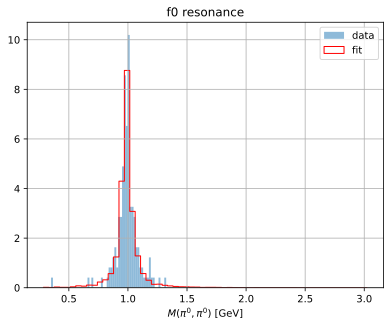

In [8]:
f0_data = frame_data['pi0_1'] + frame_data['pi0_2']
f0_fit = frame_fit['pi0_1'] + frame_fit['pi0_2']

f0_data.pwa.mass.hist(label='data',
                      bins=60, density=True, alpha=.5)
f0_fit.pwa.mass.hist(label='fit',
                     bins=60, density=True, histtype='step', color='red',
                     weights=frame_fit.pwa.intensities)

plt.xlabel('$M(\pi^0,\pi^0)$ [GeV]')
plt.legend()
plt.gca().set_title('f0 resonance')
plt.show()

In [9]:
selection = frame_data[abs(f0_data.pwa.mass - 0.990) < 0.05]
io.pawian.write_ascii(selection, 'filtered_data.dat')
io.pawian.read_ascii('filtered_data.dat', ['gamma', 'pi0', 'pi0'])

Particle     gamma                                   pi0-1            \
Momentum       p_x       p_y       p_z         E       p_x       p_y   
0        -0.182506 -0.844948  1.076130  1.380327  0.141731  0.873233   
1         0.559665 -0.873999 -0.921926  1.388181  0.030816  0.642806   
2        -1.030480  0.892277  0.264144  1.388459  0.681217 -1.064850   
3         0.116316  1.265080 -0.564446  1.390164  0.132802  0.100997   
4        -1.072190 -0.141766  0.861404  1.382645  1.230490  0.096587   
..             ...       ...       ...       ...       ...       ...   
89        1.285130  0.549771  0.048662  1.398633 -0.325851 -0.492884   
90        0.351707  0.223883 -1.309260  1.374039 -0.370255  0.172147   
91        1.303890  0.441621 -0.203768  1.391646 -1.148060 -0.246995   
92       -0.524492 -0.265778  1.252710  1.383840  0.215780 -0.239497   
93        0.545379  1.241510  0.242481  1.377528  0.198947 -0.082614   

Particle                         pi0-2                                
Momentum       p_z         E       p_x       p_y       p_z         E  
0        -1.220080  1.513090  0.040775 -0.028285  0.143952  0.203479  
1         0.822141  1.052750 -0.590482  0.231193  0.099785  0.655968  
2        -0.251640  1.295960  0.349266  0.172571 -0.012504  0.412483  
3         0.095432  0.234868 -0.249118 -1.366070  0.469014  1.471870  
4        -0.605567  1.381430 -0.158292  0.045179 -0.255837  0.332819  
..             ...       ...       ...       ...       ...       ...  
89        0.288127  0.671081 -0.959282 -0.056887 -0.336789  1.027180  
90        1.221450  1.294940  0.018548 -0.396030  0.087812  0.427918  
91        0.510475  1.287580 -0.155831 -0.194626 -0.306707  0.417672  
92       -0.992715  1.052440  0.308712  0.505275 -0.259997  0.660624  
93       -0.218520  0.335223 -0.744326 -1.158900 -0.023961  1.384150  

[94 rows x 12 columns]

## Conversion to kinematic variables

In [10]:
import logging
import pycompwa.ui as pwa
# not interested in warnings now
logger = logging.getLogger()
logger.setLevel(logging.ERROR)
pwa.Logging('ERROR');

2020-04-29 14:30:27,164 [INFO] Logging to file disabled!


In [11]:
from pycompwa.expertsystem.ui.system_control import \
    StateTransitionManager, InteractionTypes

initial_state = [("J/psi", [-1, 1])]
final_state = [("gamma"), ("pi0"), ("pi0")]
tbd_manager = StateTransitionManager(initial_state, final_state,
                                     formalism_type='helicity',
                                     topology_building='isobar')

tbd_manager.set_allowed_interaction_types([InteractionTypes.EM])
tbd_manager.allowed_intermediate_particles = ['f0(980)']

graph_interaction_settings_groups = tbd_manager.prepare_graphs()
solutions, _ = tbd_manager.find_solutions(
    graph_interaction_settings_groups)

from pycompwa.expertsystem.amplitude.helicitydecay import \
    HelicityAmplitudeGeneratorXML

model_file = 'jpsi_f0_gammapipi.xml'
xml_generator = HelicityAmplitudeGeneratorXML()
xml_generator.generate(solutions)
xml_generator.write_to_file(model_file)

In [12]:
from pycompwa.data import convert

In [13]:
try:
    convert.pandas_to_events(frame_data, model_file)
except Exception as exc:
    print('EXCEPTION:', exc)

EXCEPTION: 
  You first have to convert the columns names:
    ['gamma', 'pi0_1', 'pi0_2']
  to the final state IDs:
    [2, 3, 4]
  as defined in XML file
    "jpsi_f0_gammapipi.xml"
  with e.g. naming.particle_to_id or pandas.DataFrame.rename


In [14]:
from pycompwa.data import naming

In [15]:
naming.particle_to_id(frame_data, model_file)
frame_data.pwa.particles

[2, 'pi0_1', 'pi0_2']

As you can see, the $\gamma$ has been nicely renamed to its final state ID,
but the renaming failed for the pions (it would have worked if the separator
used for the added index for duplicate particles were a ``-``). If we follow
the second suggestion, it will work:

In [16]:
mapping = {'gamma': 2, 'pi0_1': 3, 'pi0_2': 4}
frame_data.rename(columns=mapping, inplace=True)
frame_fit.rename(columns=mapping, inplace=True)
events_data = convert.pandas_to_events(frame_data, model_file)
events_fit = convert.pandas_to_events(frame_fit, model_file)

In [17]:
from pycompwa.data import append
import pycompwa.ui as pwa

In [18]:
set_data = pwa.compute_kinematic_variables(events_data, model_file)
set_fit = pwa.compute_kinematic_variables(events_fit, model_file)
naming.id_to_particle(frame_data, model_file, make_unique=True)
naming.id_to_particle(frame_fit, model_file, make_unique=True)
append(frame_data, convert.data_set_to_pandas(set_data))
append(frame_fit, convert.data_set_to_pandas(set_fit))
frame_data.pwa.other_columns

['phi_24_3',
 'phi_23_4',
 'theta_23_4',
 'theta_2_34',
 'phi_3_4_vs_2',
 'theta_3_4_vs_2',
 'theta_2_4_vs_3',
 'theta_24_3',
 'phi_2_34',
 'mSq_(2,4)',
 'mSq_(2,3,4)',
 'mSq_(2,3)',
 'phi_2_3_vs_4',
 'phi_2_4_vs_3',
 'mSq_(3,4)',
 'theta_2_3_vs_4']

Finally, we can plot the distributions of the kinematic variables (as computed by ComPWA) **of the imported data**.

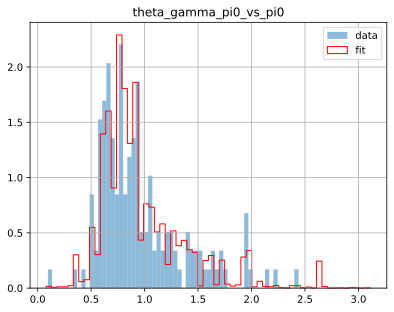

In [19]:
var = 'theta_2_4_vs_3'
frame_data[var].hist(label='data',
                     bins=60, density=True, alpha=.5)
frame_fit[var].hist(label='fit',
                    bins=60, density=True, histtype='step', color='red',
                    weights=frame_fit.pwa.intensities)
plt.gca().set_title(naming.replace_ids(var, model_file))
plt.legend();